<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

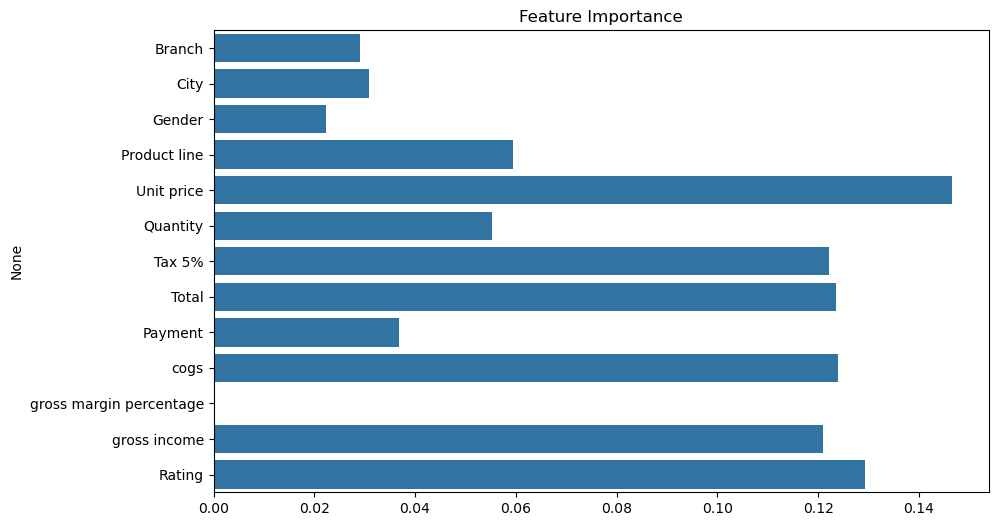

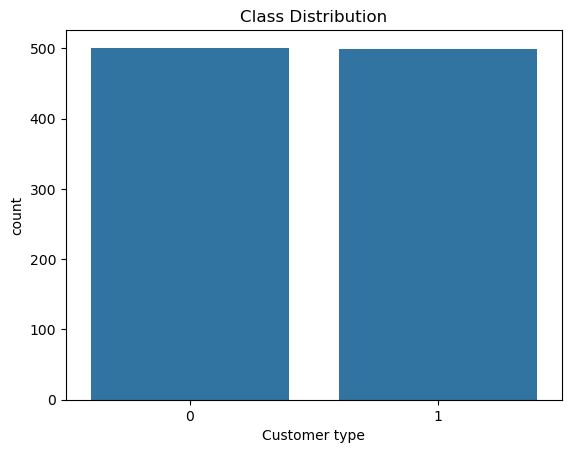

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv(r"C:\Users\94718\OneDrive\Desktop\NIBM\Principle of DS\ProtofolioIndi\GitCode1\PRINCIPLES-OF-DATA-SCIENCE-Portfolio\Data Acquisition\Data\supermarket_sales - Sheet1.csv")

# Display basic info
print(data.info())

# Check for missing values
print(data.isnull().sum())

# Fill missing values or drop rows with missing values (depending on your preference)
data = data.dropna()

# Convert categorical features to numeric using LabelEncoder
label_encoder = LabelEncoder()
data['Branch'] = label_encoder.fit_transform(data['Branch'])
data['City'] = label_encoder.fit_transform(data['City'])
data['Customer type'] = label_encoder.fit_transform(data['Customer type'])
data['Gender'] = label_encoder.fit_transform(data['Gender'])
data['Product line'] = label_encoder.fit_transform(data['Product line'])
data['Payment'] = label_encoder.fit_transform(data['Payment'])

# Scale numerical features (like 'Unit price', 'Quantity', etc.)
scaler = StandardScaler()
data[['Unit price', 'Quantity', 'Tax 5%', 'Total', 'cogs', 'gross margin percentage', 'gross income', 'Rating']] = scaler.fit_transform(
    data[['Unit price', 'Quantity', 'Tax 5%', 'Total', 'cogs', 'gross margin percentage', 'gross income', 'Rating']])

# Define X (features) and y (target)
X = data.drop(columns=['Invoice ID', 'Customer type', 'Date', 'Time'])  # Drop irrelevant columns
y = data['Customer type']

# Split the dataset into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- Random Forest Classifier ---
# Initialize the Random Forest Classifier model with initial hyperparameters
rf_model = RandomForestClassifier(n_estimators=200, max_depth=10, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# --- Cross-validation ---
cv_scores = cross_val_score(rf_model, X, y, cv=5)
print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", cv_scores.mean())

# --- Hyperparameter Tuning with GridSearchCV ---
param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

print("Best parameters from GridSearchCV:", grid_search.best_params_)

# Best model from GridSearchCV
best_rf_model = grid_search.best_estimator_

# Make predictions with the best model
y_pred_best = best_rf_model.predict(X_test)
print("Best Random Forest Accuracy:", accuracy_score(y_test, y_pred_best))
print("Classification Report for Best Random Forest:\n", classification_report(y_test, y_pred_best))

# --- Gradient Boosting ---
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)

y_pred_gb = gb_model.predict(X_test)
print("Gradient Boosting Accuracy:", accuracy_score(y_test, y_pred_gb))
print("Classification Report for Gradient Boosting:\n", classification_report(y_test, y_pred_gb))

# --- Feature Importance Visualization ---
feature_importances = rf_model.feature_importances_
features = X.columns

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=features)
plt.title("Feature Importance")
plt.show()

# --- Class Distribution Visualization ---
sns.countplot(x=y)
plt.title("Class Distribution")
plt.show()
